<a href="https://colab.research.google.com/github/FooolyHARD/AI_Lab4/blob/main/AI_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1) Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).***

<ipython-input-4-56041861980b>:18: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes[1], bins=20)


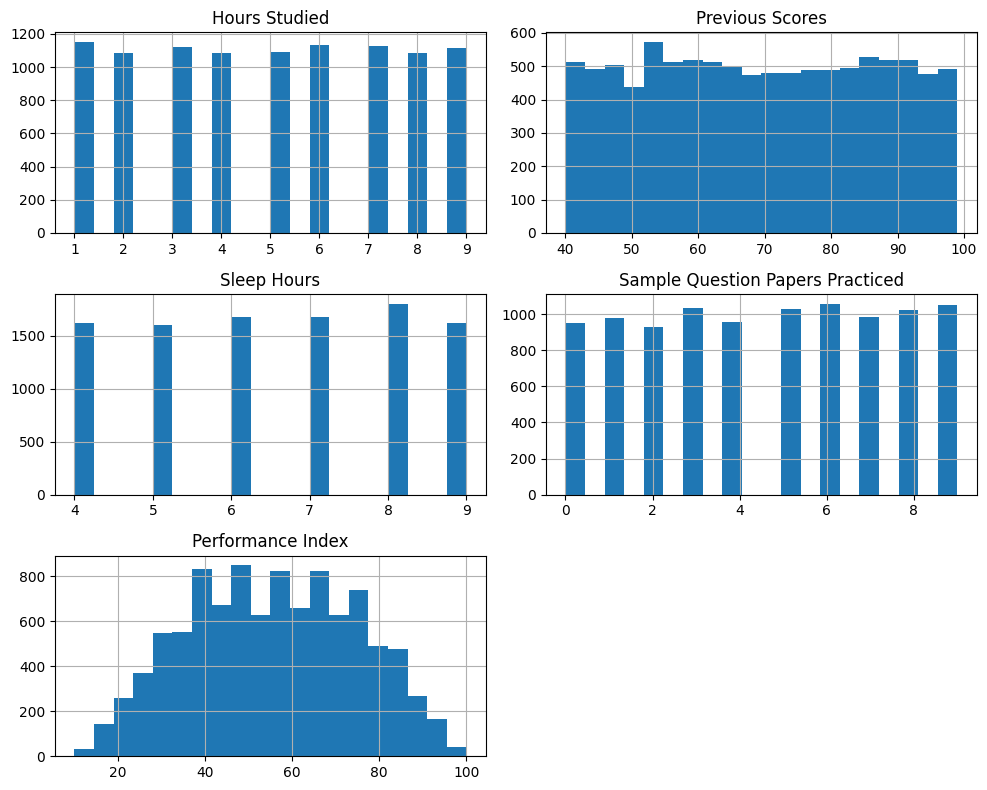

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sample_data/Student_Performance.csv')

statistics = df.describe()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

df.boxplot(ax=axes[0])
axes[0].set_title('Boxplot')

df.hist(ax=axes[1], bins=20)
axes[1].set_title('Histogram')

plt.tight_layout()
plt.show()

print(statistics)


***2) Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.***

<ipython-input-7-f8d86fbe7de6>:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_normalized.hist(ax=axes[1], bins=20)


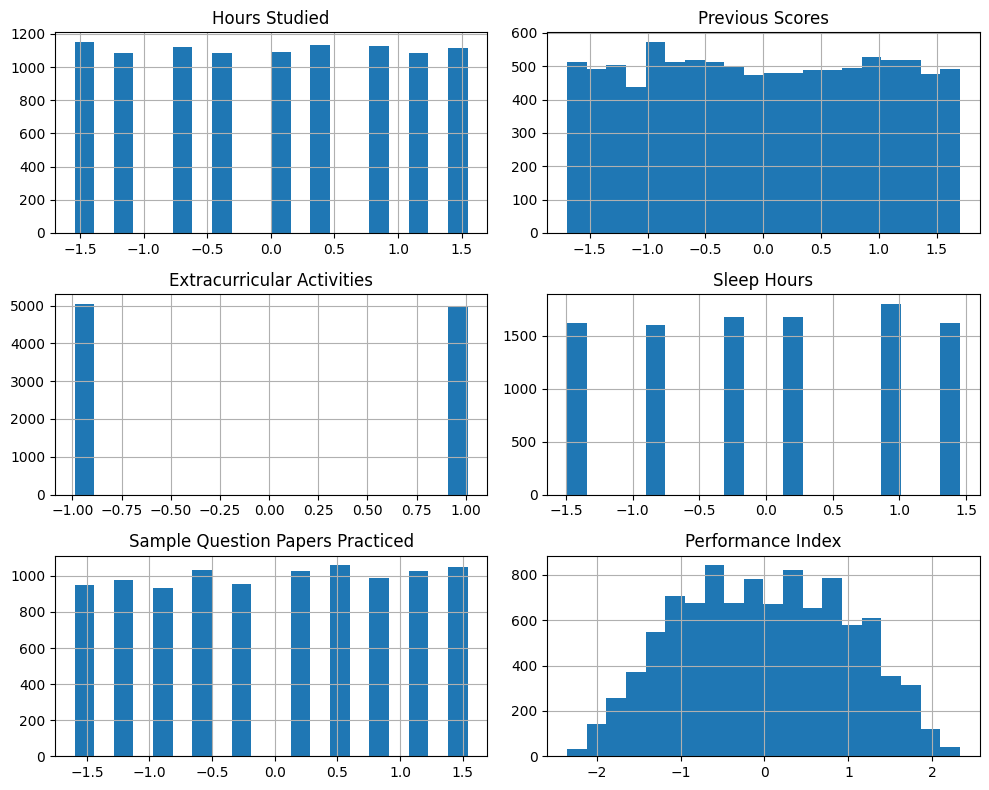

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                    1.010455     1.456205   
1      -0.383481         0.723913                   -0.989654    -1.492294   
2       1.161410        -1.063626                    1.010455     0.276805   
3       0.002742        -1.005963                    1.010455    -0.902594   
4       0.775188         0.320275                   -0.989654     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754           1.862167  
1                         -0.900982           0.508818  
2                         -0.900982          -0.532220  
3                         -0.900982          -1.000687  
4                          0.145333           0.560870  


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # 'mean', 'median' или 'most_frequent'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Кодирование категориальных признаков
le = LabelEncoder()
df_encoded = df_imputed.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Нормировка числовых признаков
scaler = StandardScaler()
df_normalized = df_encoded.copy()
df_normalized[df_normalized.columns] = scaler.fit_transform(df_normalized[df_normalized.columns])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

df_normalized.boxplot(ax=axes[0])
axes[0].set_title('Boxplot (Normalized Data)')

df_normalized.hist(ax=axes[1], bins=20)
axes[1].set_title('Histogram (Normalized Data)')

plt.tight_layout()
plt.show()

print(df_normalized.head())


***Разделите данные на обучающий и тестовый наборы данных.***

In [ ]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop('Performance Index', axis=1)
y = df_normalized['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающего набора данных:", X_train.shape)
print("Размер тестового набора данных:", X_test.shape)


Размер обучающего набора данных: (8000, 5)
Размер тестового набора данных: (2000, 5)


***Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.***

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/Student_Performance.csv')

def linear_regression(X, y):
    # Добавляем столбец единиц для свободного члена
    X = np.column_stack((np.ones(len(X)), X))

    # Решаем систему линейных уравнений для определения коэффициентов
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    return coefficients

# Преобразуем категориальный признак в числовой
df['Extracurricular Activities'] = (df['Extracurricular Activities'] == 'Yes').astype(int)

# Извлекаем признаки и целевую переменную из данных
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index'].values

coefficients = linear_regression(X, y)

print('Оптимальные коэффициенты:')
print(coefficients)

new_data = np.array([1, 6, 95, 1, 7, 3])
predicted_performance = np.dot(new_data, coefficients)

print('\nПредсказанный Performance Index для новых данных:')
print(predicted_performance)


Оптимальные коэффициенты:
[-34.07558809   2.85298205   1.01843419   0.61289758   0.48055975
   0.19380214]

Предсказанный Performance Index для новых данных:
84.35177478617004


***Постройте три модели с различными наборами признаков.***

In [ ]:
df = pd.read_csv('sample_data/Student_Performance.csv')

def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))

    # Решаем систему линейных уравнений для определения коэффициентов
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    return coefficients

# Преобразуем категориальный признак в числовой
df['Extracurricular Activities'] = (df['Extracurricular Activities'] == 'Yes').astype(int)

# Модель 1: Все признаки
features_1 = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
X_1 = df[features_1].values
y_1 = df['Performance Index'].values

coefficients_1 = linear_regression(X_1, y_1)
print('Модель 1 - Оптимальные коэффициенты:')
print(coefficients_1)

# Модель 2: Без 'Extracurricular Activities'
features_2 = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_2 = df[features_2].values
y_2 = df['Performance Index'].values

coefficients_2 = linear_regression(X_2, y_2)
print('\nМодель 2 - Оптимальные коэффициенты:')
print(coefficients_2)

# Модель 3: Только 'Hours Studied' и 'Previous Scores'
features_3 = ['Hours Studied', 'Previous Scores']
X_3 = df[features_3].values
y_3 = df['Performance Index'].values

coefficients_3 = linear_regression(X_3, y_3)
print('\nМодель 3 - Оптимальные коэффициенты:')
print(coefficients_3)



Модель 1 - Оптимальные коэффициенты:
[-34.07558809   2.85298205   1.01843419   0.61289758   0.48055975
   0.19380214]

Модель 2 - Оптимальные коэффициенты:
[-33.76372609   2.85342921   1.01858354   0.47633298   0.1951983 ]

Модель 3 - Оптимальные коэффициенты:
[-29.81678986   2.85763725   1.01912275]


***Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.***

In [ ]:
df = pd.read_csv('sample_data/Student_Performance.csv')
def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    return coefficients

# Функция для вычисления коэффициента детерминации (R^2)
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

df['Extracurricular Activities'] = (df['Extracurricular Activities'] == 'Yes').astype(int)

features_1 = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
X_1 = df[features_1].values
y_1 = df['Performance Index'].values

coefficients_1 = linear_regression(X_1, y_1)
y_pred_1 = np.dot(np.column_stack((np.ones(len(X_1)), X_1)), coefficients_1)
r2_1 = r_squared(y_1, y_pred_1)
print('Модель 1 - Коэффициент детерминации (R^2):', r2_1)

features_2 = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_2 = df[features_2].values
y_2 = df['Performance Index'].values

coefficients_2 = linear_regression(X_2, y_2)
y_pred_2 = np.dot(np.column_stack((np.ones(len(X_2)), X_2)), coefficients_2)
r2_2 = r_squared(y_2, y_pred_2)
print('\nМодель 2 - Коэффициент детерминации (R^2):', r2_2)

features_3 = ['Hours Studied', 'Previous Scores']
X_3 = df[features_3].values
y_3 = df['Performance Index'].values

coefficients_3 = linear_regression(X_3, y_3)
y_pred_3 = np.dot(np.column_stack((np.ones(len(X_3)), X_3)), coefficients_3)
r2_3 = r_squared(y_3, y_pred_3)
print('\nМодель 3 - Коэффициент детерминации (R^2):', r2_3)


Модель 1 - Коэффициент детерминации (R^2): 0.9887523323780958

Модель 2 - Коэффициент детерминации (R^2): 0.9884981216772581

Модель 3 - Коэффициент детерминации (R^2): 0.9858724242382322
